**a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.**

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import f_oneway, norm
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchy

In [3]:
# analyze descriptive statistics

data = pd.read_csv('ingredient.csv')

print("Descriptive analysis:")
data.describe()

Descriptive analysis:


,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [4]:
# correlation

print("Correlation:")
data.corr()

Correlation:


,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [5]:
# conduct the one-way ANOVA

print("One-way ANOVA:")
print(f_oneway(list(data["a"]), list(data["b"]), list(data["c"]), list(data["d"]), list(data["e"]), list(data["f"]), list(data["g"]), list(data["h"]), list(data["i"])))

One-way ANOVA:
F_onewayResult(statistic=168331.96885835085, pvalue=0.0)


In [6]:
# check data type and missing value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


**Note**

*All the features are numerical in nature and there are no missing values.*


**b. A graphical analysis of the additives, including a distribution study.bold text**

In [7]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  9


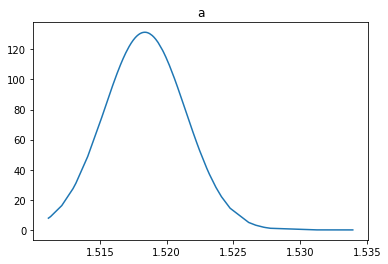

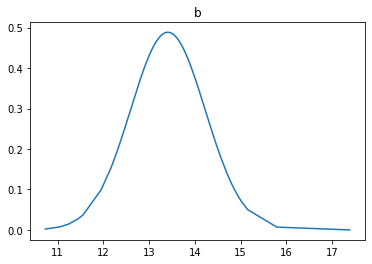

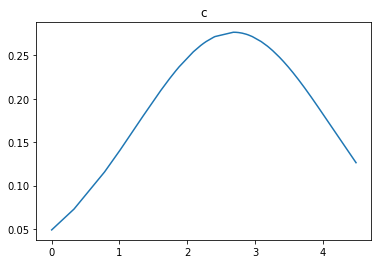

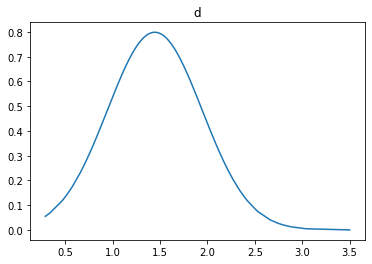

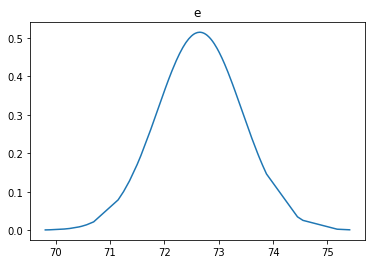

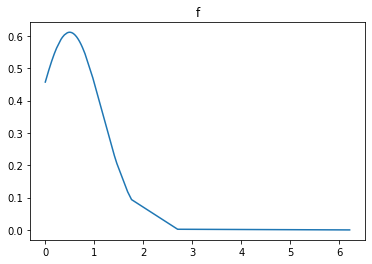

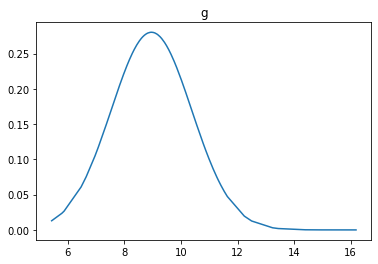

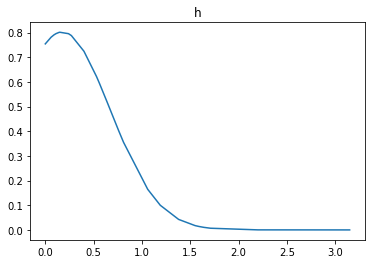

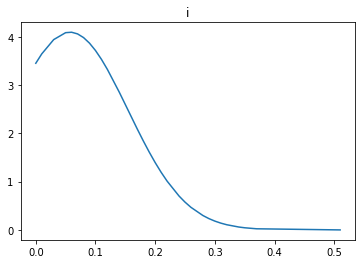

In [8]:
# analyse the distributions of thes data

def analyse_continous(df, var):
    df = df.copy()
    mean = df[var].mean()
    std = df[var].std()
    pdf = norm.pdf(df[var].sort_values(), mean, std)
    plt.plot(df[var].sort_values(), pdf)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

**Note**

*All the features are normally distributed except for f, h, i.*

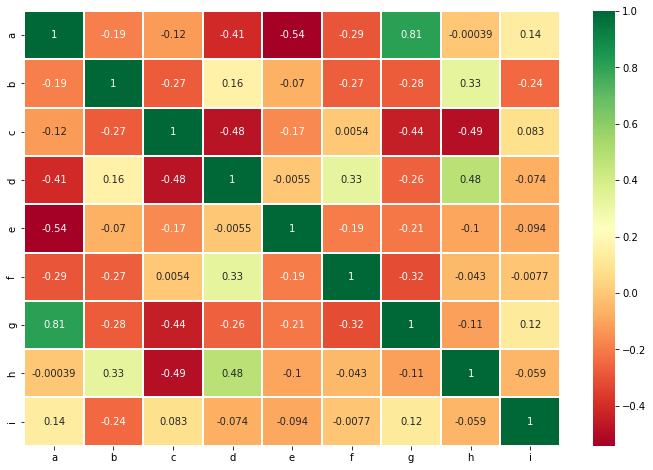

In [9]:
# Using Pearson Correlation

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

**Note**

*a & g are highly positively corelated and e & a are highly negatively corelated.*

**c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.**

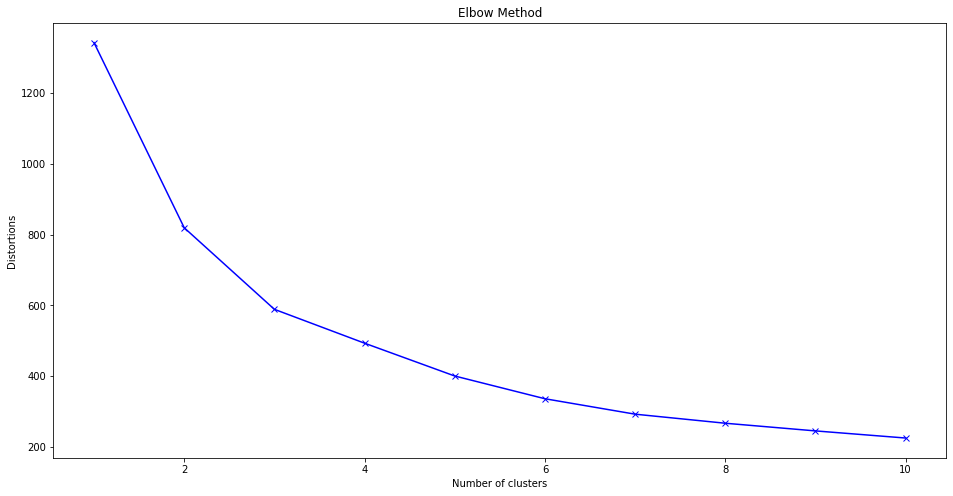

In [10]:
# Option 1: Use Elbow method to find the optimal number of clusters

X = data.copy()

distortions = []
for i in range(1, 11):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 11), distortions, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

**Note**

*We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.*

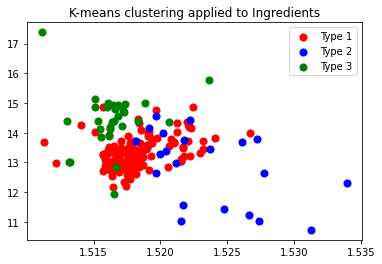

In [11]:
# visualize the clusters

kmeanModel = KMeans(n_clusters=3)
pred_y = kmeanModel.fit_predict(X)

plt.figure(2)
plt.scatter(X.iloc[pred_y == 0, 0], X.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[pred_y == 1, 0], X.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[pred_y == 2, 0], X.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.title("K-means clustering applied to Ingredients")
plt.legend()
plt.show()

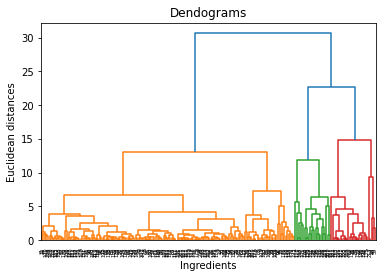

In [12]:
# Option 2: Use dendrogram to find the optimal number of clusters

Y = data.copy()

dendrogram_1 = hierarchy.dendrogram(hierarchy.linkage(Y, method = 'ward'))
fig.set_size_inches(12,8)
plt.title('Dendograms')
plt.xlabel('Ingredients')
plt.ylabel('Euclidean distances')
plt.show()

**Note**

*We can observe that 3 colours are there, this mean 3 is optimal for this case.*